In [161]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [162]:
df = pd.read_csv('titanic.csv')

In [163]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [165]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['Embarked']

In [166]:
df[cols].sample(5)

,Embarked
626,Q
244,C
479,S
661,C
629,Q


In [167]:
len(df[cols].dropna())/len(df)

0.9977553310886644

In [168]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [170]:
X_train.shape,X_test.shape

((712, 11), (179, 11))

In [171]:
X_train.isnull().mean()*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.786517
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.528090
Embarked        0.280899
dtype: float64

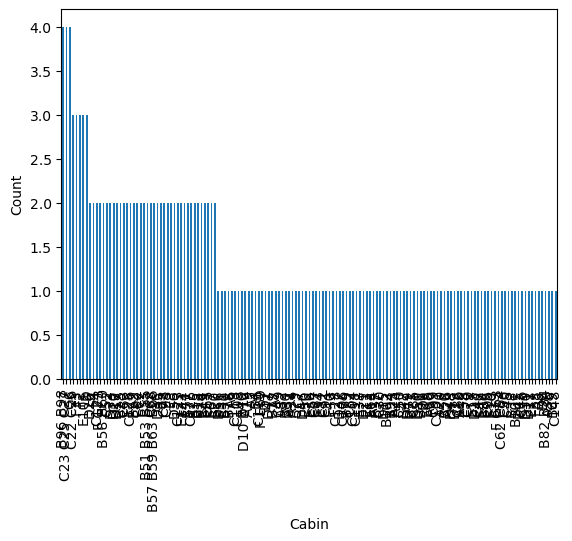

In [172]:
import matplotlib.pyplot as plt
df['Cabin'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Cabin'>

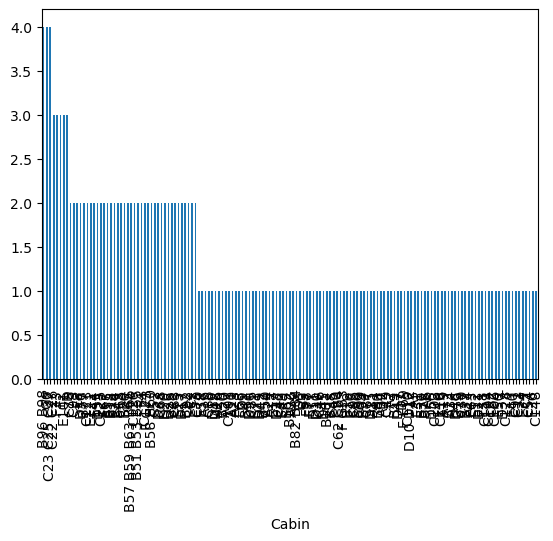

In [173]:
df['Cabin'].value_counts().plot(kind='bar')

In [174]:
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [175]:
df['Cabin'].fillna('B96',inplace=True)

C:\Users\patel\AppData\Local\Temp\ipykernel_2080\454107035.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('B96',inplace=True)


<Axes: xlabel='Cabin'>

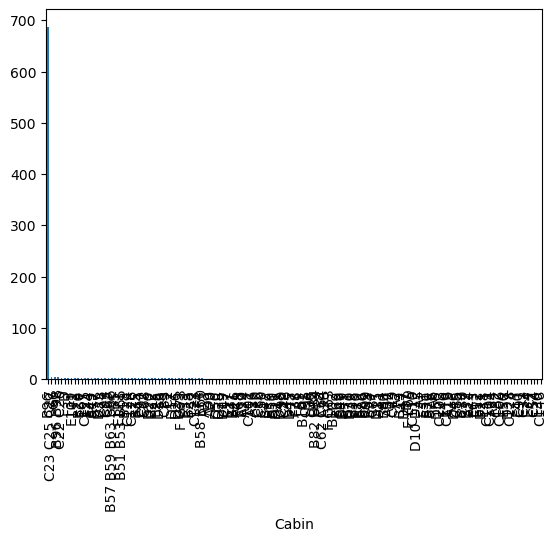

In [176]:
df['Cabin'].value_counts().plot(kind='bar')

In [177]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin           0.000000
Embarked        0.224467
dtype: float64

In [178]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()


In [179]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

In [180]:
X_train.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_mean
87,88,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.05,NaN,S,28.75,29.785904
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,35.00,35.000000
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.00,NaN,S,28.75,29.785904
188,189,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.50,NaN,Q,40.00,40.000000
705,706,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.00,NaN,S,39.00,39.000000


In [181]:
imputer = SimpleImputer(strategy='mean')

In [182]:
trf = ColumnTransformer([
    ('imputer',imputer,['Age'])
],remainder='passthrough')

In [183]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer', SimpleImputer(), ['Age'])])

In [184]:
trf.named_transformers_['imputer'].statistics_

array([29.78590426])

In [185]:
X_train = trf.transform(X_train)

In [186]:
X_train

array([[40.0, 31, 1, ..., 'C', 40.0, 40.0],
       [4.0, 11, 3, ..., 'S', 4.0, 4.0],
       [47.0, 874, 3, ..., 'S', 47.0, 47.0],
       ...,
       [71.0, 494, 1, ..., 'C', 71.0, 71.0],
       [29.78590425531915, 528, 1, ..., 'S', 28.75, 29.78590425531915],
       [29.78590425531915, 169, 1, ..., 'S', 28.75, 29.78590425531915]],
      dtype=object)

In [187]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin           0.000000
Embarked        0.224467
dtype: float64

In [188]:

imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the non-missing values in the 'Age' column and transform the column
df['Age'] = imputer.fit_transform(df[['Age']])


In [189]:
df.isnull().mean()*100

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.000000
Embarked       0.224467
dtype: float64

In [190]:
df = df.drop('Embarked', axis=1)


In [191]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148


In [192]:
from sklearn.preprocessing import OneHotEncoder

In [193]:
ohe = OneHotEncoder()

In [194]:


# One-Hot Encode the 'Sex' column
ohe = OneHotEncoder(sparse=False)
sex_ohe = ohe.fit_transform(df[['Sex']])

# Convert the OHE result to a DataFrame
sex_ohe_df = pd.DataFrame(sex_ohe, columns=ohe.get_feature_names_out(['Sex']))

# Concatenate the OHE columns with the original DataFrame
df = pd.concat([df, sex_ohe_df], axis=1).drop('Sex', axis=1)

# Display the first few rows of the updated DataFrame
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_female  Sex_male  
0         A/5 21171   7.2500   B96         0.0       1.0  
1          PC 17599  71.2833   C85         1.0       0.0  
2  STON/O2. 3101282   7.9250   B96         1.0       0.0  
3            113803  53.1000  C123         1.0       0.0  
4            373450   8.0500   

C:\Users\patel\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [195]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,B96,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,B96,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,B96,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,B96,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,B96,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,0.0,1.0


<Axes: ylabel='count'>

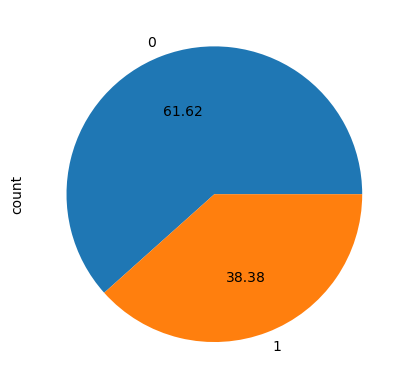

In [196]:
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

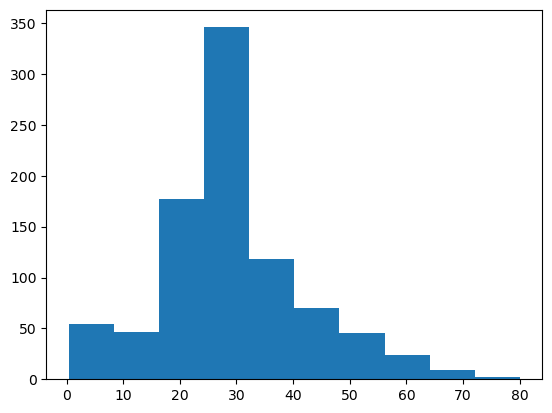

In [197]:
import matplotlib.pyplot as plt
plt.hist(df['Age'])

C:\Users\patel\AppData\Local\Temp\ipykernel_2080\2233161363.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\patel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

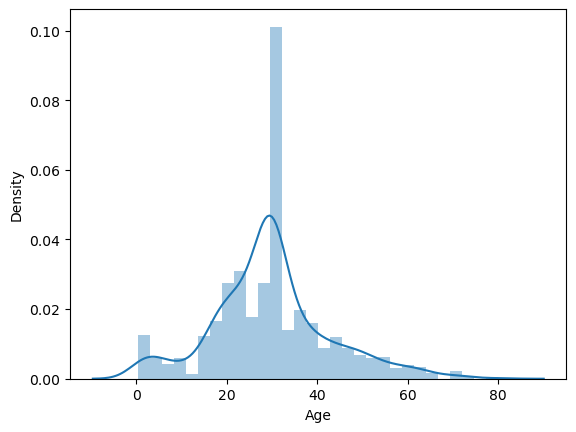

In [198]:
import seaborn as sns
sns.distplot(df['Age'])

<Axes: >

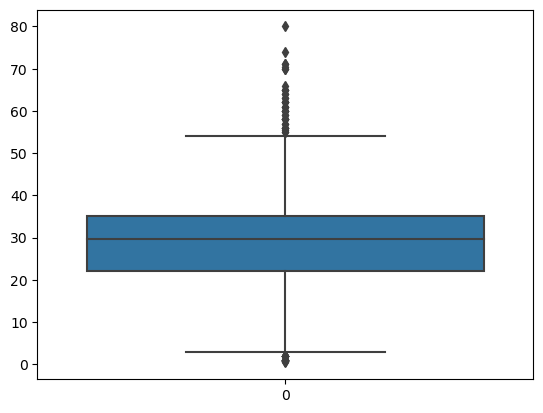

In [199]:
sns.boxplot(df['Age'])

<Axes: xlabel='Survived'>

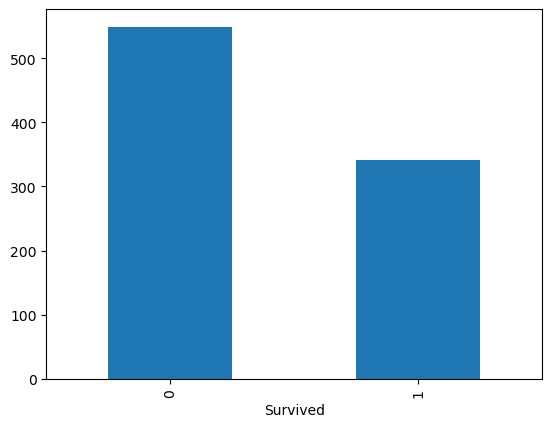

In [200]:
df['Survived'].value_counts().plot(kind='bar')

In [201]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,B96,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,B96,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,B96,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,B96,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,B96,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,0.0,1.0


In [202]:
df = df.drop(columns=['Cabin'])

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [204]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Dodge, Master. Washington'